# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

9451

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

4571

In [6]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# Sentiment scores dictionaries
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.016715,0.065600,0.057650,0.876800
std,0.398865,0.061384,0.068859,0.092058
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.317450,0.000000,0.000000,0.835250
50%,0.051350,0.065500,0.049000,0.881000
75%,0.334100,0.116500,0.083250,0.932750
max,0.526700,0.187000,0.300000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.037305,0.04200,0.051150,0.906900
std,0.405662,0.04527,0.085919,0.084171
min,-0.948500,0.00000,0.000000,0.628000
25%,-0.381800,0.00000,0.000000,0.877250
50%,0.000000,0.03800,0.020000,0.925000
75%,0.328950,0.07650,0.077500,0.955750
max,0.585900,0.13400,0.372000,1.000000


In [11]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)


### Questions:

Q: Which coin had the highest mean positive score?

In [12]:
print(f"A: Bitcoin has the highest Mean Positive score of {btc_positive_mean} which is slightly higher than the mean positive score of Ethereum {eth_positive_mean}")
    

A: Bitcoin has the highest Mean Positive score of 0.066 which is slightly higher than the mean positive score of Ethereum 0.042


Q: Which coin had the highest compound score?

In [13]:
print(f"A: Ethereum has the highest Maximum Compound score of {eth_compound_max}. At the same time, Bitcoin has the highest Mean Compound score of {btc_compound_max}")

A: Ethereum has the highest Maximum Compound score of 0.586. At the same time, Bitcoin has the highest Mean Compound score of 0.527


Q. Which coin had the highest positive score?

In [14]:
 print(f"A: Bitcoin has the highest Maximum Positive score of {btc_positive_max}.")

A: Bitcoin has the highest Maximum Positive score of 0.187.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


In [18]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [19]:
# Compile the list of lists of tokens for each Bitcoin article
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['new', 'york', 'lawmaker', 'passed', 'bill', 'would', 'temporarily', 'ban', 'new', 'bitcoin', 'mining', 'operation', 'early', 'friday', 'state', 'senator', 'voted', 'pas', 'legislation', 'bound', 'desk'], ['rapper', 'entrepreneur', 'shawn', 'carter', 'better', 'known', 'jayz', 'bringing', 'bitcoin', 'place', 'grew', 'thursday', 'jayz', 'former', 'twitter', 'ceo', 'jack', 'dorsey', 'launch', 'bitcoin'], ['new', 'study', 'bitcoin', 'call', 'question', 'whether', 'digital', 'currency', 'truly', 'decentralized', 'anonymous', 'biggest', 'devotee', 'would', 'believe', 'researchers', 'baylor', 'rice'], ['image', 'caption', 'president', 'faustinarchange', 'touadra', 'want', 'rethink', 'country', 'economic', 'philosophythe', 'central', 'african', 'republics', 'decision', 'adopt', 'bitcoin', 'legal', 'tender', 'came', 'surprise'], ['reportedly', 'pay', 'burrito', 'taco', 'bitcoin', 'digital', 'currency', 'case', 'dont', 'mind', 'spending', 'coin', 'directly', 'instead', 'going', 'exchange', 'f

In [20]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[rapper, entrepreneur, shawn, carter, better, ..."
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [21]:
# Compile the list of lists of tokens for each Ethereum article
eth_word_tokenized = []
for text in ethereum_df.text:
   # Create a list of tokenized words for each article 
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth_word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['gamestop', 'officially', 'thrown', 'headlong', 'web', 'viper', 'nest', 'new', 'app', 'release', 'though', 'hard', 'say', 'whether', 'proposed', 'population', 'gamers', 'game', 'developer', 'take'], ['gamestop', 'going', 'allin', 'crypto', 'video', 'game', 'retailer', 'launchedits', 'selfcustodial', 'ethereum', 'digital', 'wallet', 'monday', 'wallet', 'accessible', 'google', 'chrome', 'extension'], ['ability', 'conduct', 'external', 'transfer', 'paypals', 'crypto', 'platform', 'image', 'seen', 'start', 'rolling', 'user', 'available', 'everyone', 'us', 'next'], ['decentralized', 'autonomous', 'organization', 'dao', 'giving', 'away', 'two', 'seat', 'blue', 'origin', 'flight', 'spacethis', 'likely', 'first', 'time', 'nonfungible', 'token', 'nfts', 'played', 'role', 'minting'], ['crypto', 'winter', 'may', 'ethereum', 'looks', 'like', 'buy', 'winklevoss', 'twin', 'cutting', 'staff', 'gemini', 'say', 'crypto', 'winter', 'upon', 'u', 'price', 'ethereum', 'cryptocurrency', 'eth'], ['new', 'y

In [22]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, officially, thrown, headlong, web, ..."
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfer, paypals..."
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[decentralized, autonomous, organization, dao,..."
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875,"[crypto, winter, may, ethereum, looks, like, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Create a flat list of Bitcoin tokenized words from a list of list
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
print(btc_flat_word_tokenized_list)

['new', 'york', 'lawmaker', 'passed', 'bill', 'would', 'temporarily', 'ban', 'new', 'bitcoin', 'mining', 'operation', 'early', 'friday', 'state', 'senator', 'voted', 'pas', 'legislation', 'bound', 'desk', 'rapper', 'entrepreneur', 'shawn', 'carter', 'better', 'known', 'jayz', 'bringing', 'bitcoin', 'place', 'grew', 'thursday', 'jayz', 'former', 'twitter', 'ceo', 'jack', 'dorsey', 'launch', 'bitcoin', 'new', 'study', 'bitcoin', 'call', 'question', 'whether', 'digital', 'currency', 'truly', 'decentralized', 'anonymous', 'biggest', 'devotee', 'would', 'believe', 'researchers', 'baylor', 'rice', 'image', 'caption', 'president', 'faustinarchange', 'touadra', 'want', 'rethink', 'country', 'economic', 'philosophythe', 'central', 'african', 'republics', 'decision', 'adopt', 'bitcoin', 'legal', 'tender', 'came', 'surprise', 'reportedly', 'pay', 'burrito', 'taco', 'bitcoin', 'digital', 'currency', 'case', 'dont', 'mind', 'spending', 'coin', 'directly', 'instead', 'going', 'exchange', 'first', 'f

In [25]:
# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('new', 'york'): 1, ('york', 'lawmaker'): 1, ('lawmaker', 'passed'): 1, ('passed', 'bill'): 1, ('bill', 'would'): 1, ('would', 'temporarily'): 1, ('temporarily', 'ban'): 1, ('ban', 'new'): 1, ('new', 'bitcoin'): 1, ('bitcoin', 'mining'): 2, ('mining', 'operation'): 1, ('operation', 'early'): 1, ('early', 'friday'): 1, ('friday', 'state'): 1, ('state', 'senator'): 1, ('senator', 'voted'): 1, ('voted', 'pas'): 1, ('pas', 'legislation'): 1, ('legislation', 'bound'): 1, ('bound', 'desk'): 1, ('desk', 'rapper'): 1, ('rapper', 'entrepreneur'): 1, ('entrepreneur', 'shawn'): 1, ('shawn', 'carter'): 1, ('carter', 'better'): 1, ('better', 'known'): 1, ('known', 'jayz'): 1, ('jayz', 'bringing'): 1, ('bringing', 'bitcoin'): 1, ('bitcoin', 'place'): 1, ('place', 'grew'): 1, ('grew', 'thursday'): 1, ('thursday', 'jayz'): 1, ('jayz', 'former'): 1, ('former', 'twitter'): 1, ('twitter', 'ceo'): 1, ('ceo', 'jack'): 1, ('jack', 'dorsey'): 1, ('dorsey', 'launch'): 1, ('launch', 'bitcoin'): 1, ('bitcoin',

In [26]:
# Create a flat list of Ethereum tokenized words from a list of list
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
print(eth_flat_word_tokenized_list)

['gamestop', 'officially', 'thrown', 'headlong', 'web', 'viper', 'nest', 'new', 'app', 'release', 'though', 'hard', 'say', 'whether', 'proposed', 'population', 'gamers', 'game', 'developer', 'take', 'gamestop', 'going', 'allin', 'crypto', 'video', 'game', 'retailer', 'launchedits', 'selfcustodial', 'ethereum', 'digital', 'wallet', 'monday', 'wallet', 'accessible', 'google', 'chrome', 'extension', 'ability', 'conduct', 'external', 'transfer', 'paypals', 'crypto', 'platform', 'image', 'seen', 'start', 'rolling', 'user', 'available', 'everyone', 'us', 'next', 'decentralized', 'autonomous', 'organization', 'dao', 'giving', 'away', 'two', 'seat', 'blue', 'origin', 'flight', 'spacethis', 'likely', 'first', 'time', 'nonfungible', 'token', 'nfts', 'played', 'role', 'minting', 'crypto', 'winter', 'may', 'ethereum', 'looks', 'like', 'buy', 'winklevoss', 'twin', 'cutting', 'staff', 'gemini', 'say', 'crypto', 'winter', 'upon', 'u', 'price', 'ethereum', 'cryptocurrency', 'eth', 'new', 'york', 'lawm

In [27]:
# Generate the Ethereum N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('gamestop', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'gamestop'): 1, ('gamestop', 'going'): 1, ('going', 'allin'): 1, ('allin', 'crypto'): 1, ('crypto', 'video'): 1, ('video', 'game'): 1, ('game', 'retailer'): 1, ('retailer', 'launchedits'): 1, ('launchedits', 'selfcustodial'): 1, ('selfcustodial', 'ethereum'): 1, ('ethereum', 'digital'): 1, ('digital', 'wallet'): 1, ('wallet', 'monday'): 1, ('monday', 'wallet'): 1, ('wallet', 'accessible'): 1, ('accessible', 'google'): 1, ('google', 'chrome'): 1, ('chrome', 'extension'): 1, ('extension', 'ability'): 1, ('ability', 

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_flat_word_tokenized_list)

[('bitcoin', 15),
 ('new', 8),
 ('token', 6),
 ('blockchain', 6),
 ('digital', 4),
 ('biggest', 4),
 ('cryptocurrencies', 4),
 ('cryptocurrency', 4),
 ('reuters', 4),
 ('world', 4)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_flat_word_tokenized_list)

[('cryptocurrency', 10),
 ('crypto', 5),
 ('new', 4),
 ('ethereum', 4),
 ('market', 4),
 ('year', 4),
 ('nft', 4),
 ('video', 3),
 ('digital', 3),
 ('monday', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

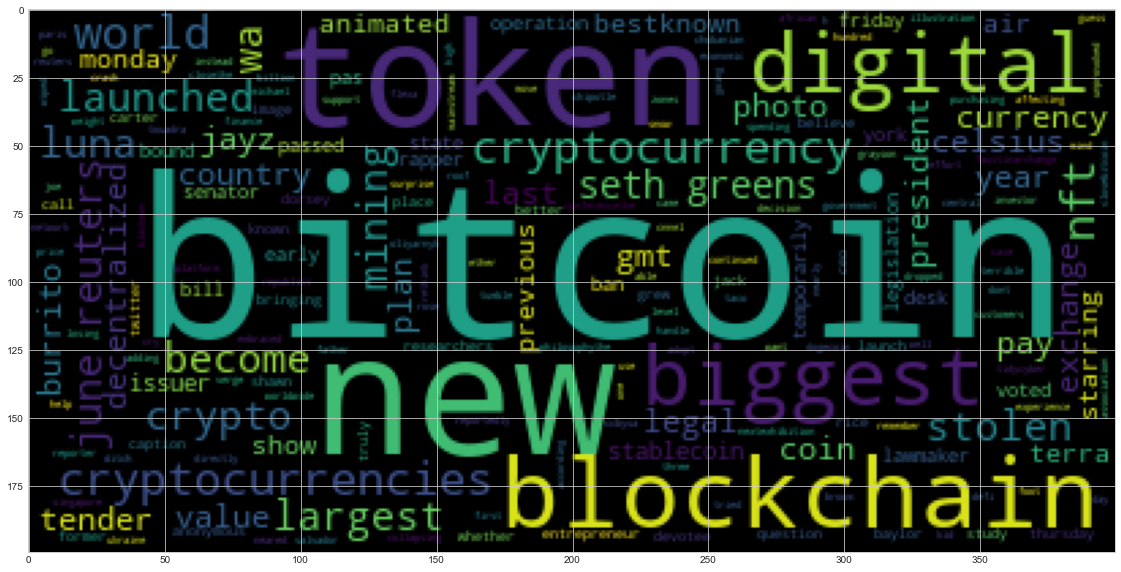

In [32]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list ])

btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc);

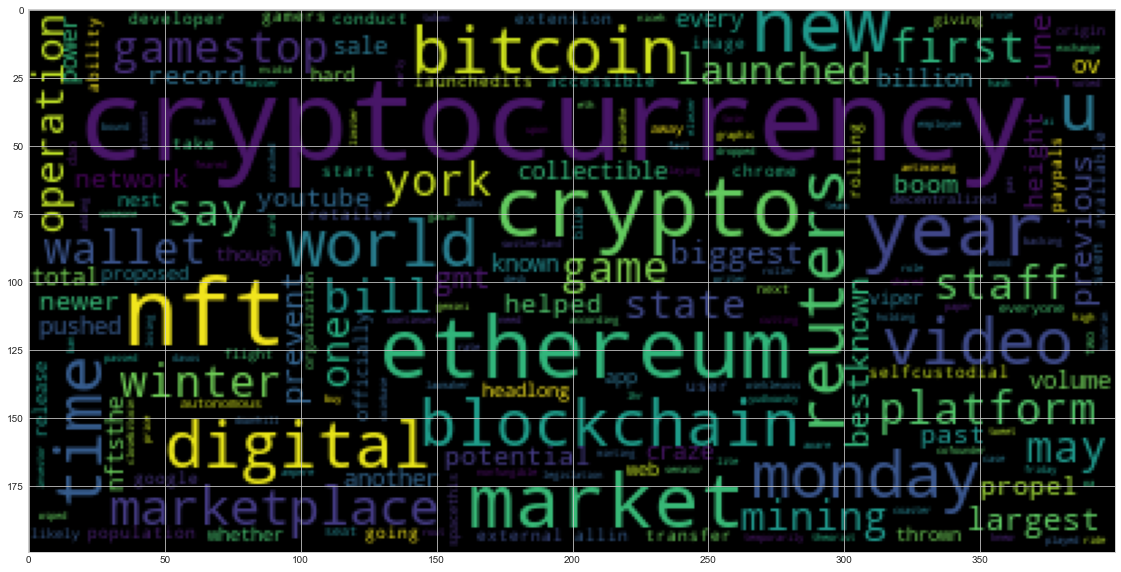

In [33]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join([str(elem) for elem in eth_flat_word_tokenized_list ])

eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# Compile the list of lists of texts for each Bitcoin article
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert a list of texts into a single string of texts   
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

In [ ]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [ ]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [ ]:
# List all Entities
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

In [ ]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [ ]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [ ]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

---